#Predicting Sales Performance Using Machine Learning Models Based on Advertising Spend

##1.Project Overview

The primary goal of this project is to predict the sales revenue (target variable: "Sales") based on the amount spent on different advertising channels, specifically TV, radio, and newspaper advertisements. The project aims to leverage various machine learning models to identify the most effective advertising medium in driving sales and to optimize advertising budgets for maximum return on investment.



##2.Data Information

https://www.kaggle.com/datasets/sazid28/advertising.csv


* TV: Amount spent on TV ads in dollars
* Radio: Amount spent on radio ads in dollars
* Newspaper: Amount spent on newspaper ads in dollars
* Sales: Sales revenue in dollars (target variable)


##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [4]:
# Loading the dataset
file_path = 'Advertising.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Check its rows and columns
df.shape

(200, 5)

In [6]:
# Check its duplication
df.duplicated().sum()

0

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Check its missing values
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [10]:
# Check its duplication
df.duplicated().sum()

0

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

##4.Exploratory Data Analysis (EDA)

###Correlation Heatmap

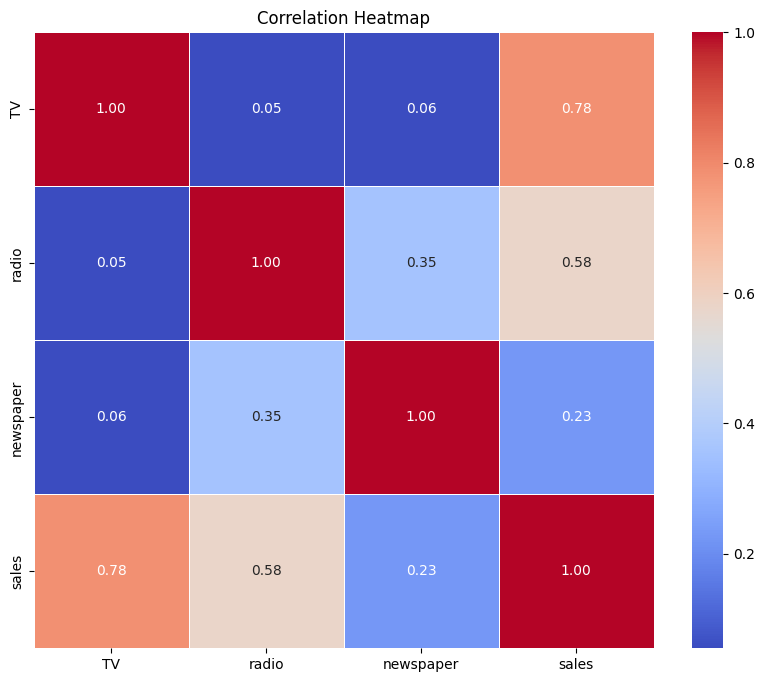

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

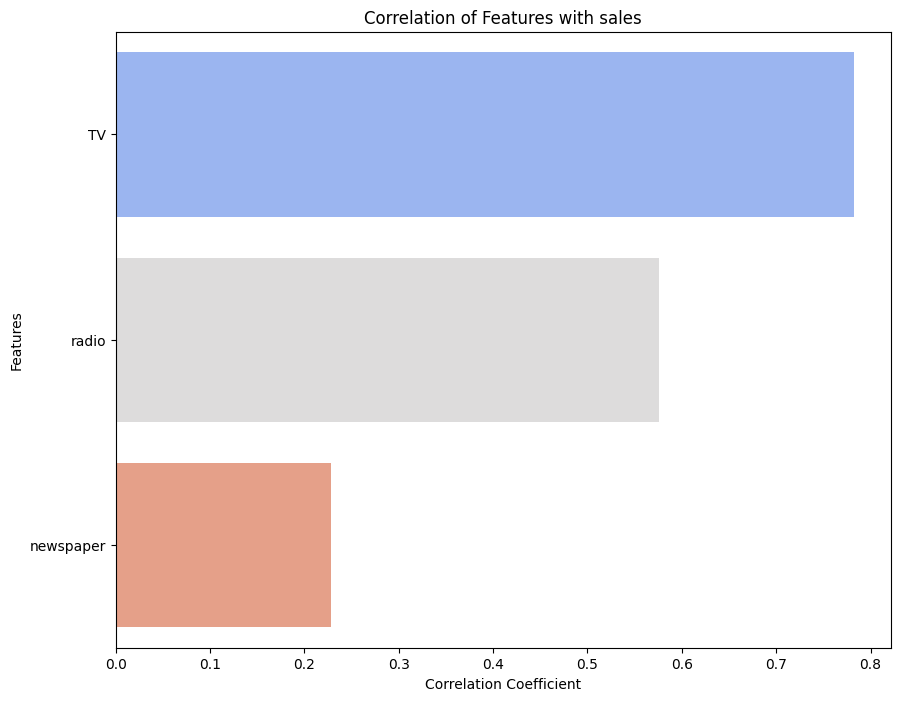

In [14]:
corr_with_medv = df.corr()['sales'].drop('sales').sort_values(ascending=False)
# Plotting the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_medv.values, y=corr_with_medv.index, palette='coolwarm')
plt.title("Correlation of Features with sales")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

###Pairplot

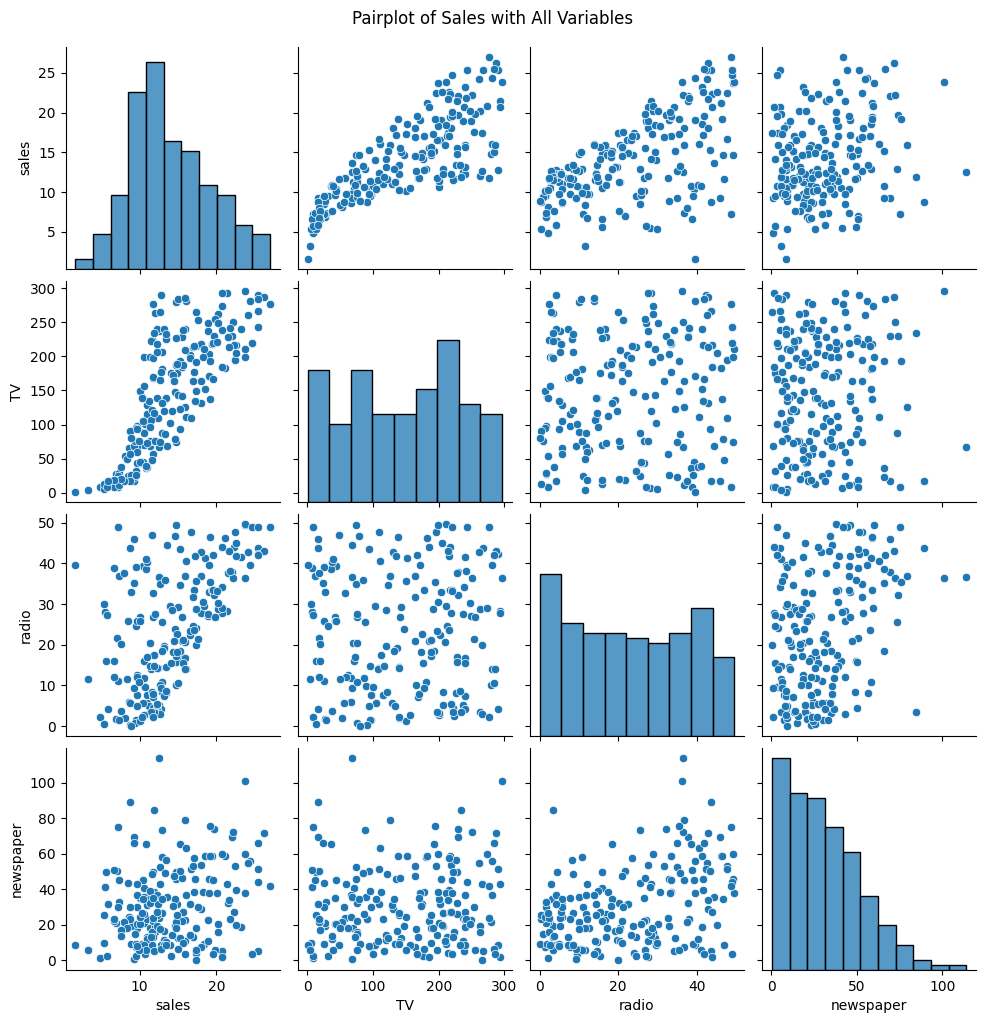

In [38]:
# Pairplot of sales with all variables
pairplot = sns.pairplot(df, vars=['sales','TV','radio', 'newspaper'])
pairplot.fig.suptitle('Pairplot of Sales with All Variables', y=1.02)  # y=1.02 adjusts the title position
plt.show()

###sales (Target Variable)

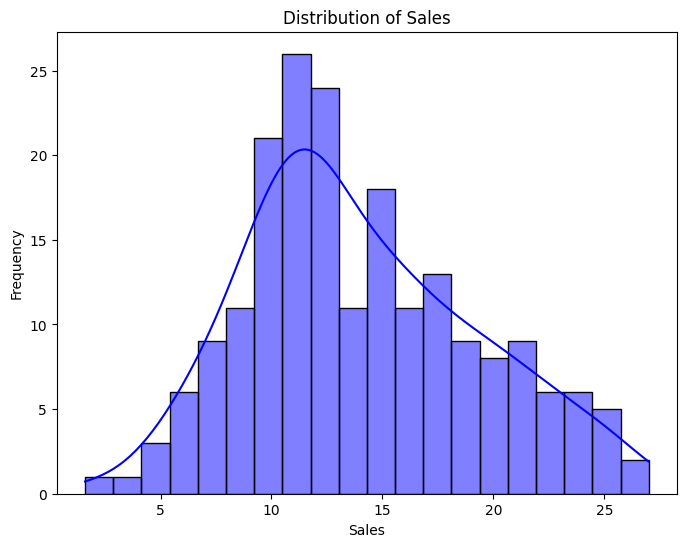

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['sales'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

###TV

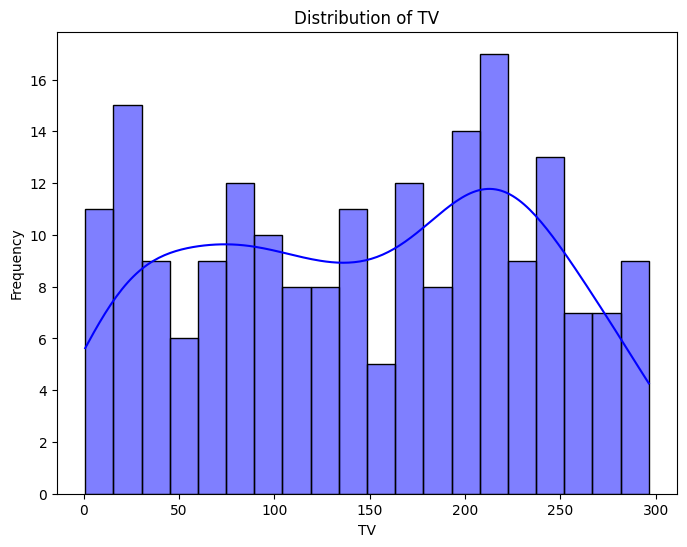

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TV'], kde=True, bins=20, color='blue')
plt.title('Distribution of TV')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()

###radio

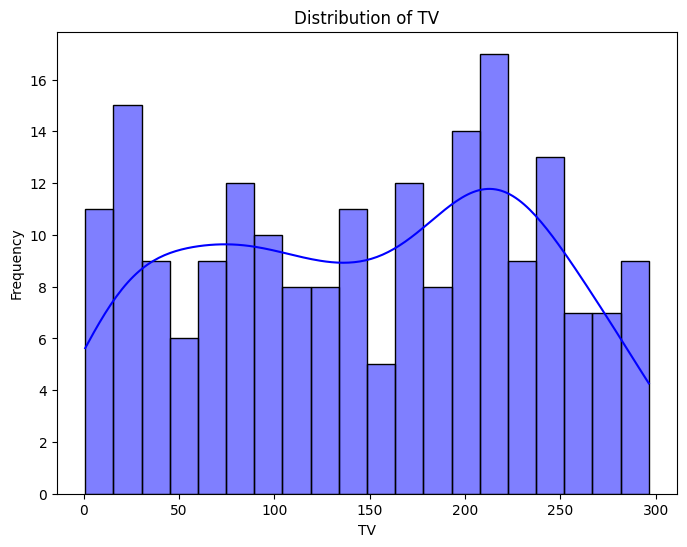

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TV'], kde=True, bins=20, color='blue')
plt.title('Distribution of TV')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()

###newspaper

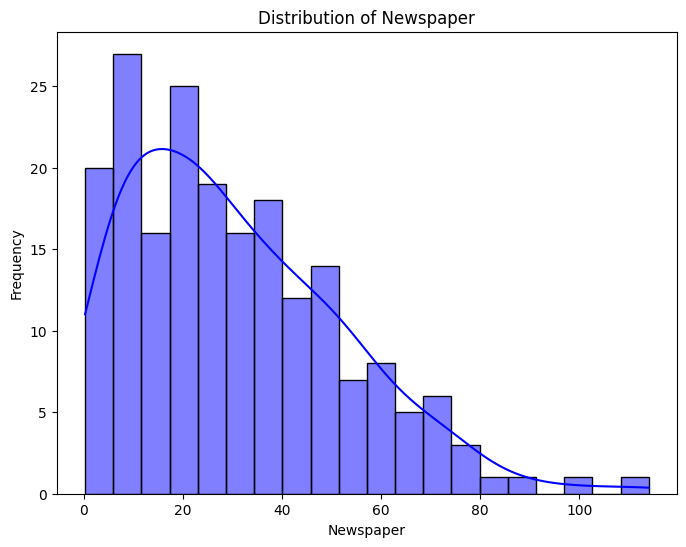

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(df['newspaper'], kde=True, bins=20, color='blue')
plt.title('Distribution of Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.show()

##5.Predictive Modeling

###Model Training

####Data Preparating

In [15]:
# Prepare the features (X) and target (y)
X = df.drop(columns=['sales'])
y = df['sales']

In [16]:
# Identify categorical and numerical columns
numerical_cols = ['TV', 'radio', 'newspaper']

In [17]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical features
    ])

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Model Selection and Training

In [19]:
# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Support Vector Regression (SVR)': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'K-Nearest Neighbors Regression (KNN)': KNeighborsRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'Quantile Regression': QuantileRegressor(),
    'Principal Component Regression (PCR)': make_pipeline(PCA(), LinearRegression()),
    'Partial Least Squares Regression (PLS)': PLSRegression(),
    'Theil-Sen Estimator': TheilSenRegressor(),
    'RANSAC Regression': RANSACRegressor(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting Machines (GBM)': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': cb.CatBoostRegressor(verbose=0, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'Stochastic Gradient Boosting': GradientBoostingRegressor(subsample=0.5, random_state=42),
    'Quantile Boosting': GradientBoostingRegressor(loss='quantile', random_state=42)
}

In [20]:
# Function to train and evaluate each model
results = {'Model': [], 'MAE': [], 'MSE': [], 'R-squared': []}

for model_name, model in models.items():
    # Set the solver for QuantileRegressor to 'highs'
    if model_name == 'Quantile Regression':
        model.set_params(solver='highs')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results['Model'].append(model_name)
    results['MAE'].append(mean_absolute_error(y_test, y_pred))
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R-squared'].append(r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 14.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

###Model Evaluation

In [21]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='R-squared', ascending= False, inplace=True)

# Display the results
results_df

,Model,MAE,MSE,R-squared
20,CatBoost,0.467556,0.396682,0.987432
4,Polynomial Regression,0.526179,0.412910,0.986918
22,Stochastic Gradient Boosting,0.540654,0.422310,0.986620
17,Gradient Boosting Machines (GBM),0.618119,0.532165,0.983140
7,Random Forest Regression,0.620725,0.591025,0.981275
19,LightGBM,0.633914,0.797032,0.974748
18,XGBoost,0.725829,0.868933,0.972470
21,HistGradientBoosting,0.702376,0.936526,0.970329
16,AdaBoost,0.964442,1.353347,0.957123
6,Decision Tree Regression,0.952500,1.638750,0.948081


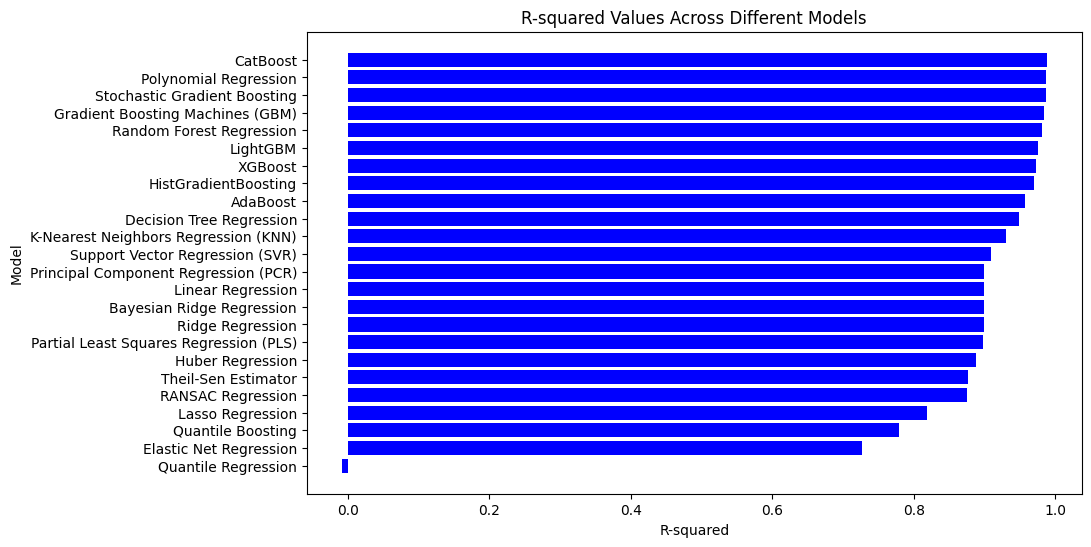

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='blue')
plt.xlabel('R-squared')
plt.ylabel('Model')
plt.title('R-squared Values Across Different Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 14.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

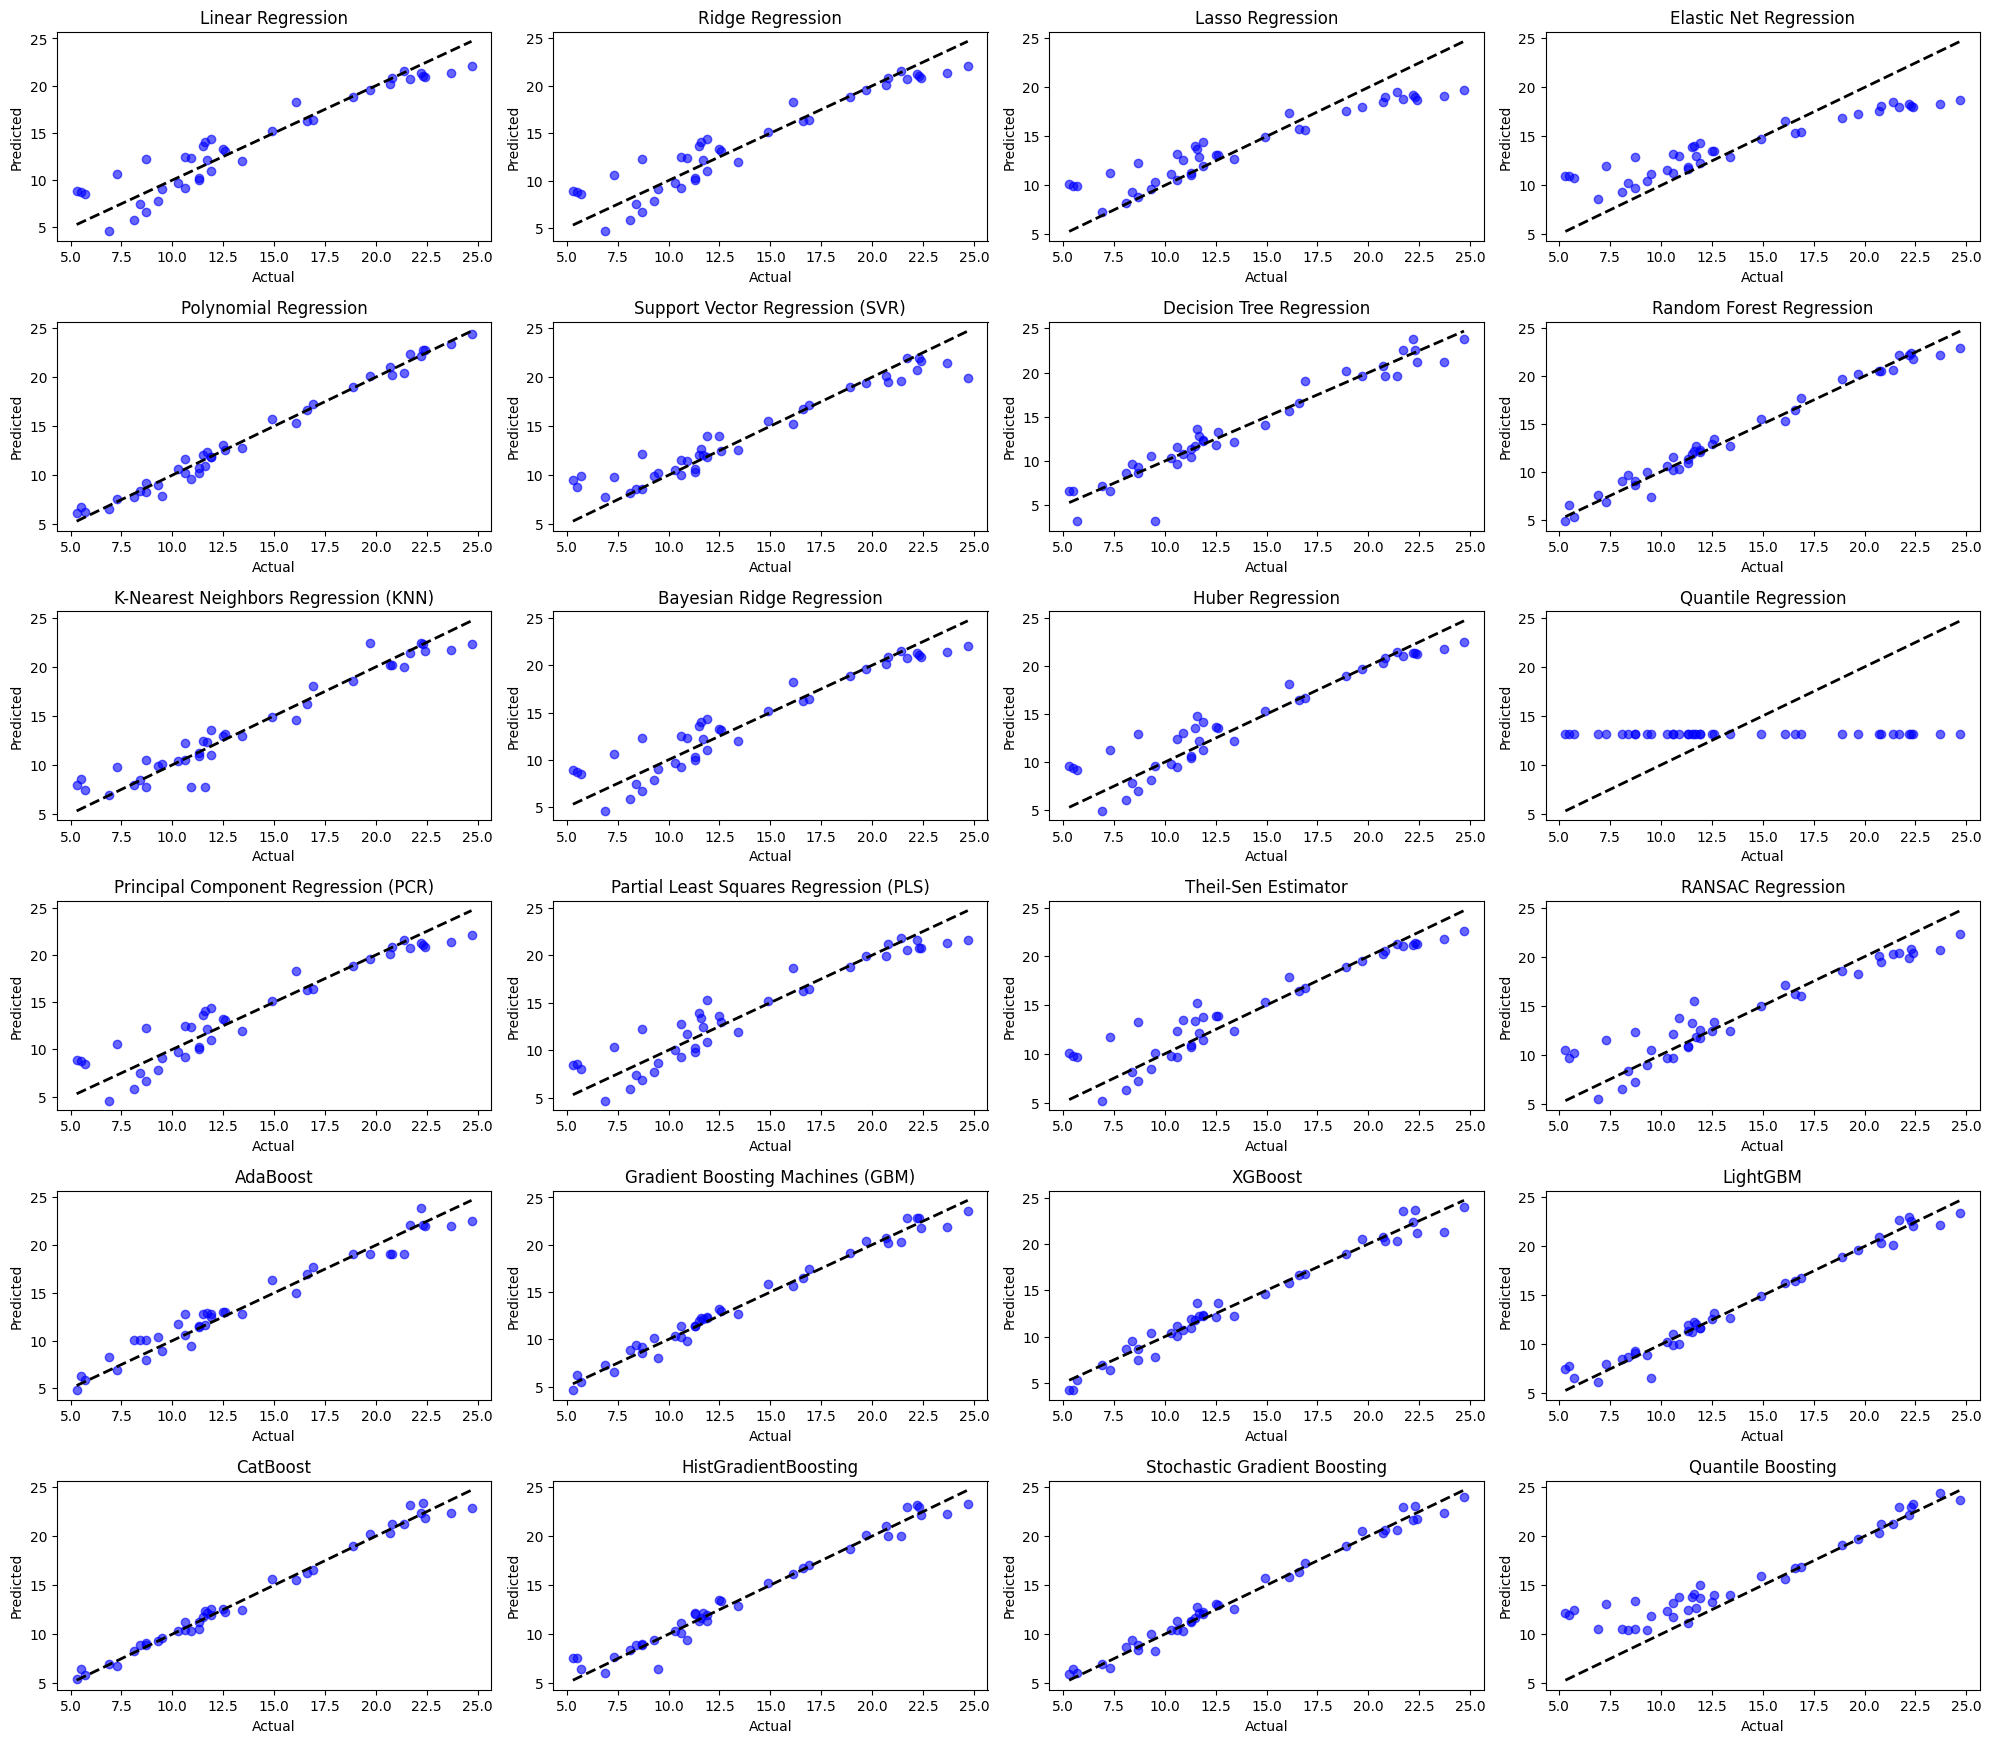

In [23]:
# Plotting the results
plt.figure(figsize=(20, 20))
n_models = len(models)
n_cols = 4
n_rows = (n_models // n_cols) + 1

for i, (model_name, model) in enumerate(models.items(), 1):
    # Pipeline for preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    # Generate predictions on the test data
    y_test_pred = pipeline.predict(X_test)

    # Subplot for each model
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(model_name)

plt.tight_layout()
plt.show()

###Best Model

####Hyperparameter Tuning

In [30]:
# Initialize and train the CatBoost model
catboost_model = cb.CatBoostRegressor(
    verbose=0,
    random_state=42,
    l2_leaf_reg=3.0  # Regularization parameter
)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.4892461804362931
Mean Squared Error: 0.4116971601777239
R-squared: 0.9869565815781758


In [31]:
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_y.head(10)

,y_test,y_pred
95,16.9,16.632347
15,22.4,21.918165
30,21.4,21.064344
158,7.3,6.750053
128,24.7,22.723147
115,12.6,12.473733
69,22.3,23.218264
170,8.4,8.820257
174,11.5,11.830884
45,14.9,15.451744


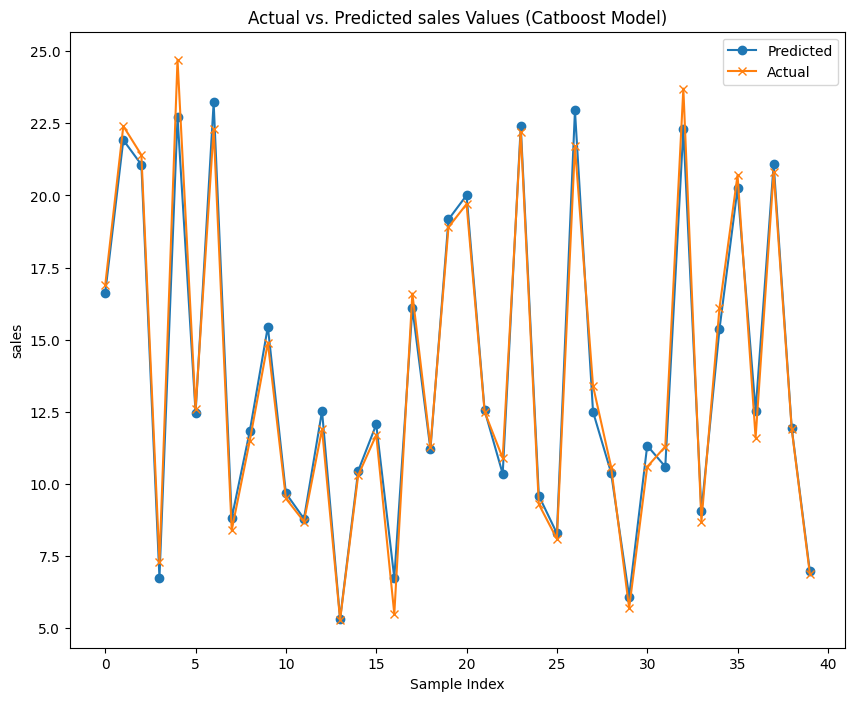

In [43]:
plt.figure(figsize=(10, 8))

plt.plot(y_pred, label='Predicted', linestyle='-', marker='o')
plt.plot(y_test.values, label='Actual', linestyle='-', marker='x')
plt.ylabel("sales")
plt.xlabel("Sample Index")
plt.title("Actual vs. Predicted sales Values (Catboost Model)")
plt.legend()
plt.show()

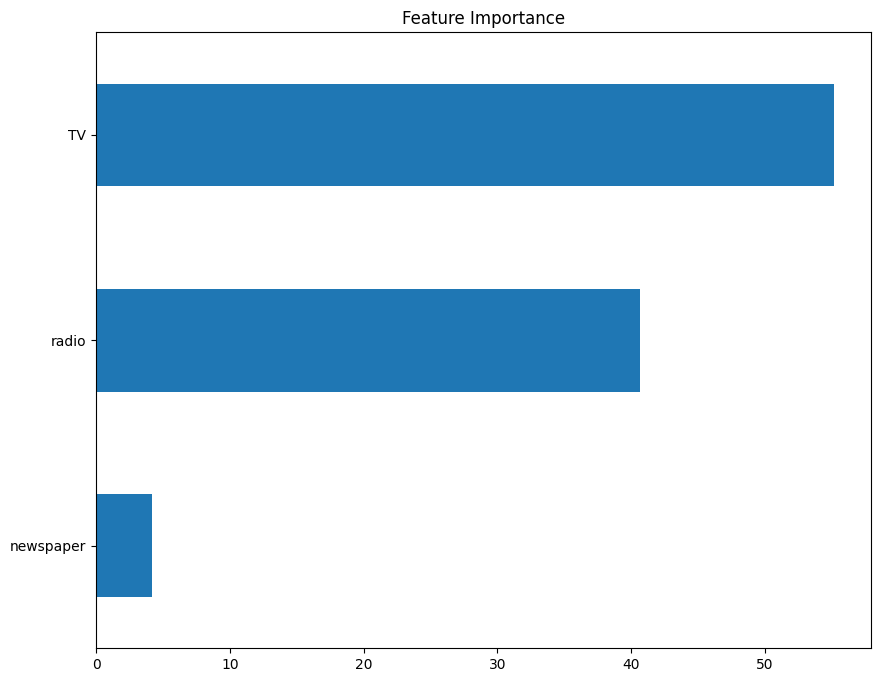

In [33]:
# Plot Feature Importance
feature_importances = pd.Series(catboost_model.feature_importances_, index=X.columns)
# Sort the feature importances in descending order and plot a horizontal bar chart
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()

####Checking Overfitting

In [34]:
# Training performance
y_train_pred = catboost_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance
y_test_pred = catboost_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, R-squared: {train_r2}")
print(f"Testing MSE: {test_mse}, R-squared: {test_r2}")

Training MSE: 0.04689965009499843, R-squared: 0.998191733573859
Testing MSE: 0.4116971601777239, R-squared: 0.9869565815781758


##6.Conclusion

**CatBoost** is the best model for predicting sales based on advertising spend, providing the most accurate results with the lowest error and highest R-squared value.